Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [101]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
import warnings 

warnings.filterwarnings( "ignore")


In [2]:
Data_og=pd.read_excel("C:/Users/anamk/Downloads/Election_Data.xlsx")

In [3]:
Data_og.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
Data_og.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [5]:
Data_og.shape

(1525, 10)

In [6]:
Data_og.drop('Unnamed: 0', axis=1,inplace=True)

In [7]:
Data_og.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [8]:
Data_og.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [9]:
Data_og.duplicated().sum()

8

In [10]:
Data_og.drop_duplicates(keep='first', inplace=True)

In [11]:
Data_og.duplicated().sum()

0

In [12]:
Data_og.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [13]:
Data_og['vote']=Data_og.vote.astype('category')

In [14]:
Data_og.dtypes

vote                       category
age                           int64
economic.cond.national        int64
economic.cond.household       int64
Blair                         int64
Hague                         int64
Europe                        int64
political.knowledge           int64
gender                       object
dtype: object

In [15]:
Data_og['gender']=Data_og.gender.astype('category')

In [16]:
Data_og.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1517 non-null   category
 1   age                      1517 non-null   int64   
 2   economic.cond.national   1517 non-null   int64   
 3   economic.cond.household  1517 non-null   int64   
 4   Blair                    1517 non-null   int64   
 5   Hague                    1517 non-null   int64   
 6   Europe                   1517 non-null   int64   
 7   political.knowledge      1517 non-null   int64   
 8   gender                   1517 non-null   category
dtypes: category(2), int64(7)
memory usage: 98.0 KB


In [19]:
for feature in Data_og.columns: 
    if Data_og[feature].dtype == 'category': 
        Data_og[feature] = pd.Categorical(Data_og[feature]).codes

In [20]:
Data_og.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 97.8 KB


In [21]:
Data_og.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [22]:
def univariateAnalysis_numeric(column,nbins):
    plt.figure(figsize=(10,10))
    plt.subplot(221)
    sns.distplot(Data_og[column],kde=True,color='g')
    plt.subplot(222)
    ax=sns.boxplot(x=Data_og[column])
    plt.show()

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


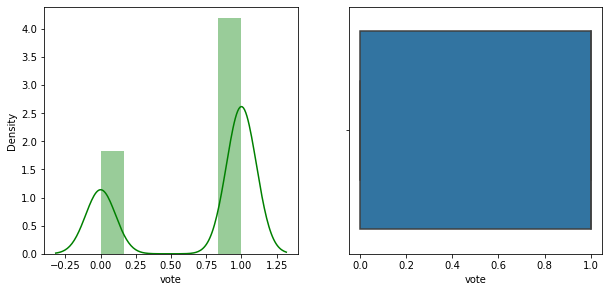

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


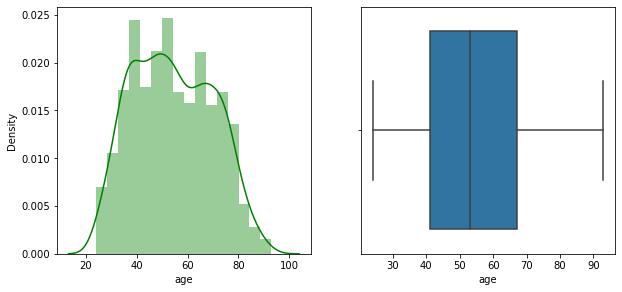

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


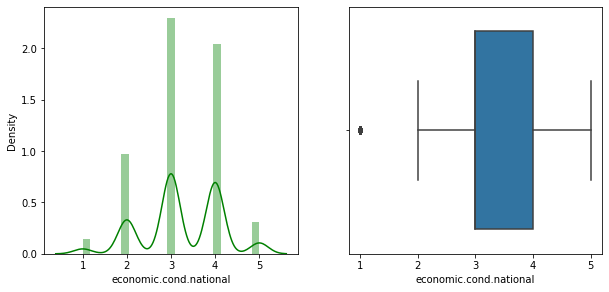

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


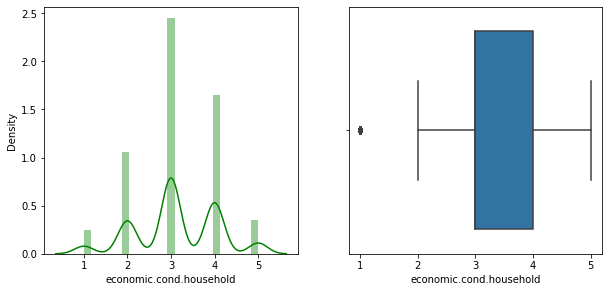

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


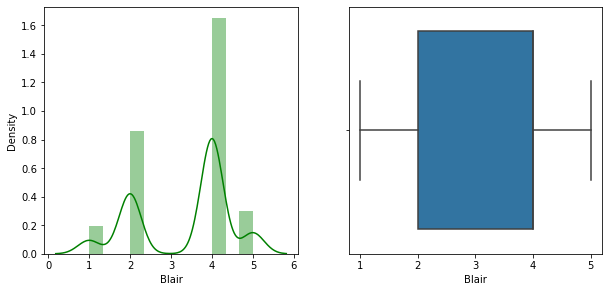

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


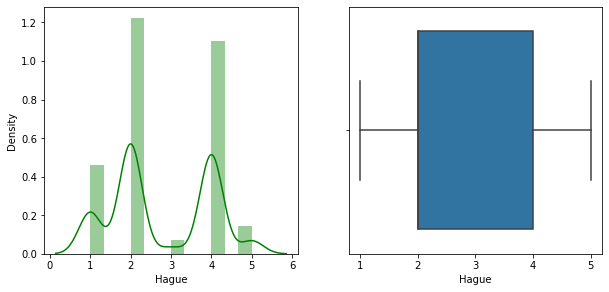

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


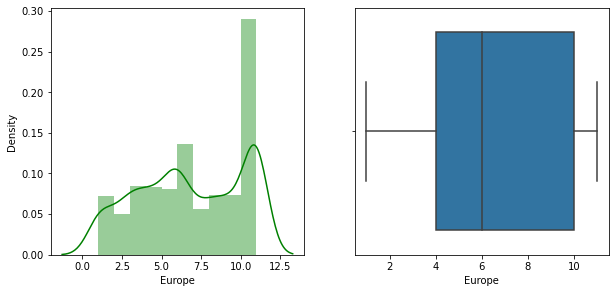

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


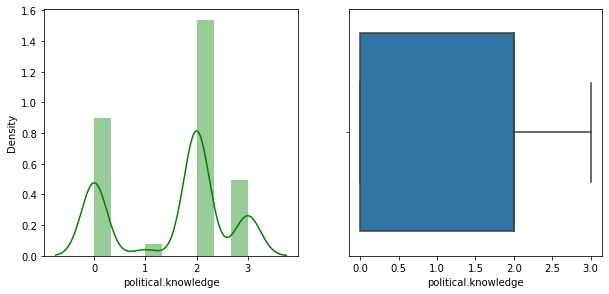

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


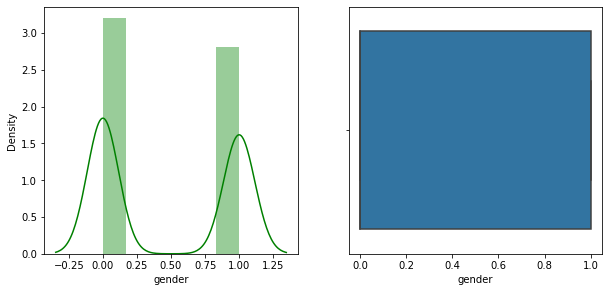

In [23]:
for i in Data_og.columns:
        univariateAnalysis_numeric(i,10)

In [24]:
corr=Data_og.corr()

<AxesSubplot:>

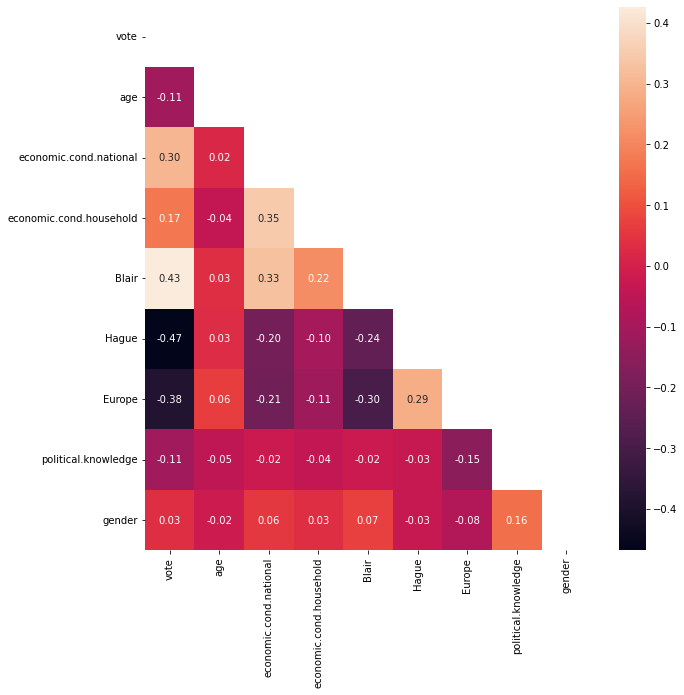

In [25]:
plt.figure(figsize=(10,10))
matrix = np.triu(corr)
sns.heatmap(corr, annot=True,fmt='.2f', mask=matrix)

In [26]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=(Q1-(1.5*IQR))
    upper_range=(Q3+(1.5*IQR))
    return lower_range, upper_range

In [27]:
for column in Data_og.columns:
    lr,ur=remove_outliers(Data_og[column])
    Data_og[column]=np.where(Data_og[column]>ur,ur,Data_og[column])
    Data_og[column]=np.where(Data_og[column]<lr,lr,Data_og[column])

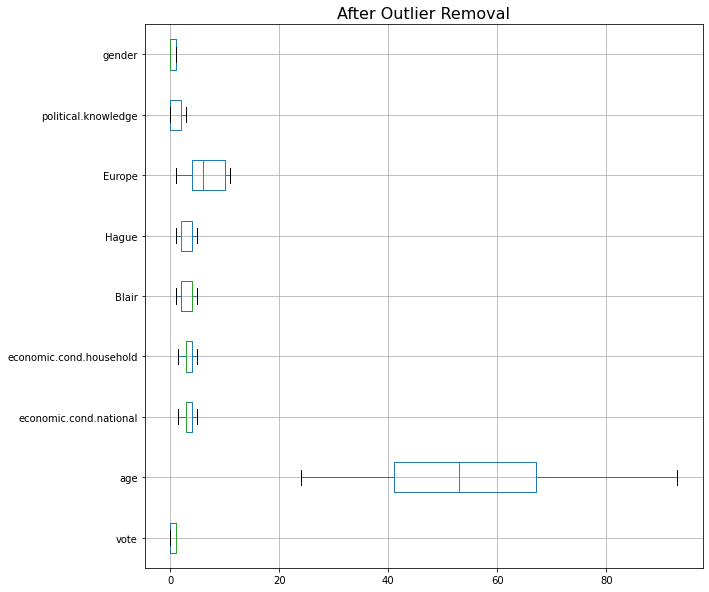

In [28]:
plt.figure(figsize=(10,10))
Data_og.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [29]:
X = Data_og.drop('vote', axis=1)
y=Data_og[['vote']]


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

LOGISTIC



In [127]:
model_logit_test = LogisticRegression() # Logistics on test
model_logit_test.fit(X_train, y_train)
y_predict = model_logit_test.predict(X_test)
model_score = model_logit_test.score(X_test, y_test)
print(model_score)


0.831140350877193


In [166]:
print(metrics.confusion_matrix(y_test, y_predict)) # Logistics on test

print(metrics.classification_report(y_test, y_predict)); # Logistics on test

[[ 92  46]
 [ 31 287]]
              precision    recall  f1-score   support

         0.0       0.75      0.67      0.70       138
         1.0       0.86      0.90      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



In [168]:
model_logit_train = LogisticRegression() # Logistics on train
model_logit_train.fit(X_train, y_train)
y_predict = model_logit_train.predict(X_train)
model_score1 = model_logit_train.score(X_train, y_train)
print(model_score1)

0.8303487276154571


In [169]:
print(metrics.confusion_matrix(y_train, y_predict)) # Logistics on train

print(metrics.classification_report(y_train, y_predict)); # Logistics on train

[[215 107]
 [ 73 666]]
              precision    recall  f1-score   support

         0.0       0.75      0.67      0.70       322
         1.0       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



LDA



In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [44]:
clf_lda = LinearDiscriminantAnalysis()
model_lda=clf_lda.fit(X_train,y_train)

C:\Users\anamk\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
clf_lda.intercept_ 

array([3.2937096])

In [47]:
pred_class_train = model_lda.predict(X_train)

pred_class_test = model_lda.predict(X_test)

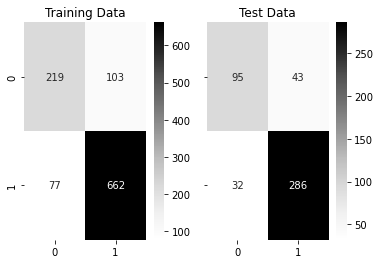

In [48]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [49]:
print('Classification Report of the training data_LDA:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data_LDa:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')


Classification Report of the training data_LDA:

               precision    recall  f1-score   support

         0.0       0.74      0.68      0.71       322
         1.0       0.87      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data_LDa:

               precision    recall  f1-score   support

         0.0       0.75      0.69      0.72       138
         1.0       0.87      0.90      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456
 



KNN






In [57]:
from scipy.stats import zscore
Data_scaled=Data_og.apply(zscore)
Data_scaled.head().round(2)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0.66,-0.72,-0.30,-0.18,0.57,-1.42,-1.44,0.42,-0.94
1,0.66,-1.16,0.87,0.95,0.57,1.01,-0.53,0.42,1.07
2,0.66,-1.23,0.87,0.95,1.42,-0.61,-1.13,0.42,1.07
3,0.66,-1.93,0.87,-1.31,-1.14,-1.42,-0.83,-1.42,-0.94
4,0.66,-0.84,-1.47,-1.31,-1.99,-1.42,-0.22,0.42,1.07


In [58]:
#Scaling the data as KNN is distance based
X_KNN = Data_og.drop('vote', axis=1)
y_KNN=Data_og[['vote']]

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_KNN,y_KNN,test_size=0.3,random_state=100)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

C:\Users\anamk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [53]:
#train Data
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8576814326107446
[[233  89]
 [ 62 677]]
              precision    recall  f1-score   support

         0.0       0.79      0.72      0.76       322
         1.0       0.88      0.92      0.90       739

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.86      0.86      0.86      1061



In [54]:
#test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7850877192982456
[[ 82  56]
 [ 42 276]]
              precision    recall  f1-score   support

         0.0       0.66      0.59      0.63       138
         1.0       0.83      0.87      0.85       318

    accuracy                           0.79       456
   macro avg       0.75      0.73      0.74       456
weighted avg       0.78      0.79      0.78       456



In [134]:
#with K=10

from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=10)
KNN_model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [95]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8454288407163054
[[232  90]
 [ 74 665]]
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74       322
         1.0       0.88      0.90      0.89       739

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [96]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7960526315789473
[[ 92  46]
 [ 47 271]]
              precision    recall  f1-score   support

         0.0       0.66      0.67      0.66       138
         1.0       0.85      0.85      0.85       318

    accuracy                           0.80       456
   macro avg       0.76      0.76      0.76       456
weighted avg       0.80      0.80      0.80       456



In [97]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

C:\Users\anamk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\anamk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\anamk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\anamk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[0.26315789473684215,
 0.22587719298245612,
 0.2149122807017544,
 0.1885964912280702,
 0.1864035087719298,
 0.1907894736842105,
 0.20614035087719296,
 0.19298245614035092,
 0.1885964912280702,
 0.20175438596491224]

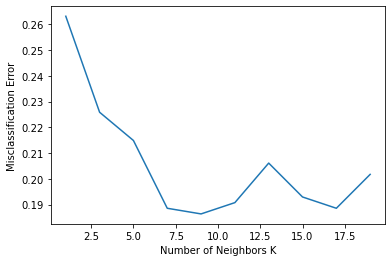

In [98]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [99]:
from sklearn.naive_bayes import GaussianNB # Naive Baye's

from sklearn import metrics

In [102]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [104]:
#train Data performance
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))   

0.8378887841658812
[[236  86]
 [ 86 653]]
              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73       322
         1.0       0.88      0.88      0.88       739

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [105]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))

0.8114035087719298
[[ 94  44]
 [ 42 276]]
              precision    recall  f1-score   support

         0.0       0.69      0.68      0.69       138
         1.0       0.86      0.87      0.87       318

    accuracy                           0.81       456
   macro avg       0.78      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



In [106]:
NB_model.score(X_train, y_train)


0.8378887841658812

In [107]:
NB_model.score(X_test, y_test)


0.8114035087719298

In [108]:
from sklearn.ensemble import RandomForestClassifier


In [109]:
clfRF=RandomForestClassifier(n_estimators=100)


In [111]:
clfRF.fit(X_train,y_train)


RandomForestClassifier()

In [112]:
y_pred=clfRF.predict(X_test)
model_scoreRF = clfRF.score(X_test, y_test)

In [113]:
print(model_scoreRF)
print(metrics.confusion_matrix(y_test, y_pred))


0.8114035087719298
[[ 94  44]
 [ 42 276]]


In [118]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [123]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[322   0]
 [  0 739]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       322
         1.0       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [124]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8026315789473685
[[ 99  39]
 [ 51 267]]
              precision    recall  f1-score   support

         0.0       0.66      0.72      0.69       138
         1.0       0.87      0.84      0.86       318

    accuracy                           0.80       456
   macro avg       0.77      0.78      0.77       456
weighted avg       0.81      0.80      0.80       456



In [140]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [141]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8463713477851084
[[227  95]
 [ 68 671]]
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74       322
         1.0       0.88      0.91      0.89       739

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [142]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8157894736842105
[[ 91  47]
 [ 37 281]]
              precision    recall  f1-score   support

         0.0       0.71      0.66      0.68       138
         1.0       0.86      0.88      0.87       318

    accuracy                           0.82       456
   macro avg       0.78      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



In [143]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [144]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8934967012252591
[[255  67]
 [ 46 693]]
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82       322
         1.0       0.91      0.94      0.92       739

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [145]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[ 94  44]
 [ 37 281]]
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70       138
         1.0       0.86      0.88      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



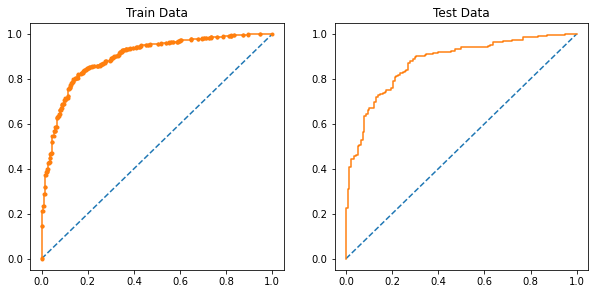

In [150]:
#ROC Logistics
# Train
probs_logit_train = model_logit_train.predict_proba(X_train)
probs_logit_train = probs_logit_train[:, 1]
plt.figure(figsize=(10,10))
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs_logit_train)
plt.subplot(221)
plt.title('Train Data')

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

#Test
probs_logit_test = model_logit_test.predict_proba(X_test)
probs_logit_test = probs_logit_test[:, 1]
plt.subplot(222)
plt.title('Test Data')
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs_logit_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


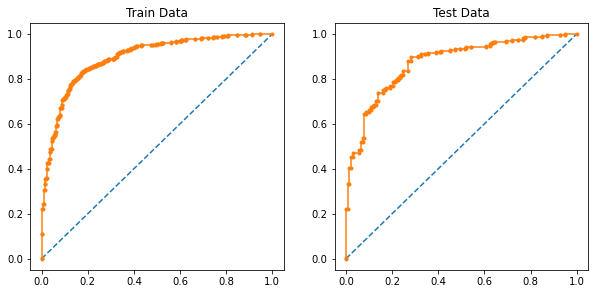

In [133]:
#ROC LDA
# Train
pred_prob_train = model_lda.predict_proba(X_train)
pred_prob_train[:,1]
plt.figure(figsize=(10,10))
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


pred_prob_test = model_lda.predict_proba(X_test)
pred_prob_test[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.subplot(222)
plt.title('Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

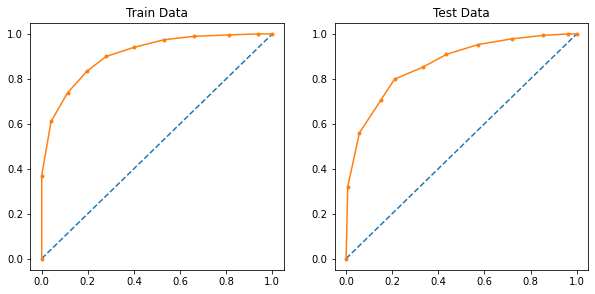

In [136]:
#ROC KNN
# Train
pred_prob_train = KNN_model.predict_proba(X_train)
pred_prob_train[:,1]
plt.figure(figsize=(10,10))
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

#Test
pred_prob_test = KNN_model.predict_proba(X_test)
pred_prob_test[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.subplot(222)
plt.title('Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')




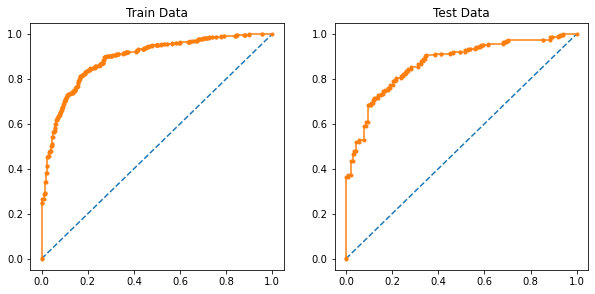

In [137]:
#ROC Naive Bayes
# Train
pred_prob_train = NB_model.predict_proba(X_train)
pred_prob_train[:,1]
plt.figure(figsize=(10,10))
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

#Test
pred_prob_test = NB_model.predict_proba(X_test)
pred_prob_test[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.subplot(222)
plt.title('Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

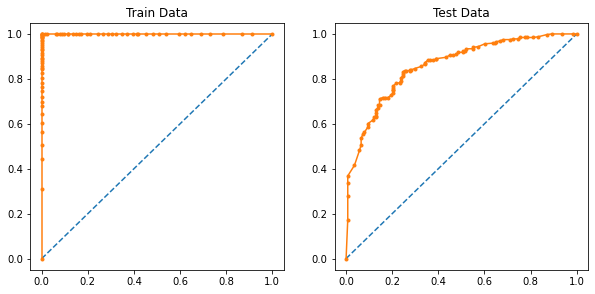

In [138]:
#ROC Bagging
# Train
pred_prob_train = Bagging_model.predict_proba(X_train)
pred_prob_train[:,1]
plt.figure(figsize=(10,10))
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

#Test
pred_prob_test = Bagging_model.predict_proba(X_test)
pred_prob_test[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.subplot(222)
plt.title('Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

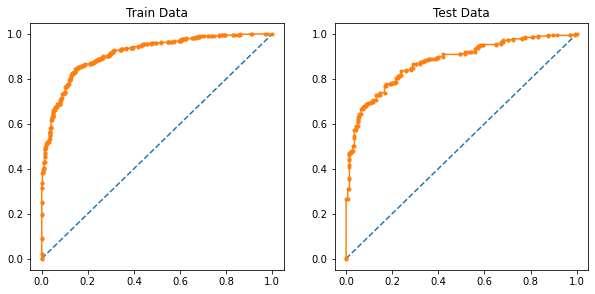

In [146]:
#ROC Adaboost
# Train
pred_prob_train = ADB_model.predict_proba(X_train)
pred_prob_train[:,1]
plt.figure(figsize=(10,10))
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

#Test
pred_prob_test = ADB_model.predict_proba(X_test)
pred_prob_test[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.subplot(222)
plt.title('Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

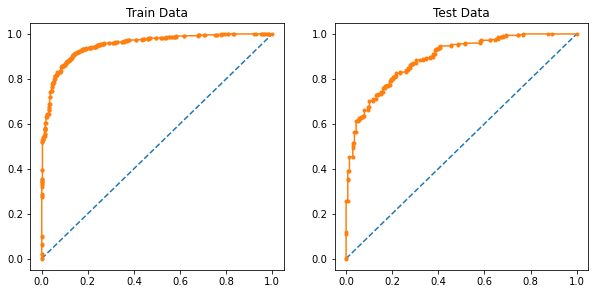

In [147]:
#ROC Gradientboost
# Train
pred_prob_train = gbcl.predict_proba(X_train)
pred_prob_train[:,1]
plt.figure(figsize=(10,10))
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

#Test
pred_prob_test = gbcl.predict_proba(X_test)
pred_prob_test[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.subplot(222)
plt.title('Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

In [152]:
#AUC Logistic

pred_prob_train = model_logit_train.predict_proba(X_train)
pred_prob_train[:,1]
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC CART TRAIN DATA: %.3f' % auc)

pred_prob_test = model_logit_test.predict_proba(X_test)
pred_prob_test[:,1]
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC CART TEST DATA: %.3f' % auc)

AUC CART TRAIN DATA: 0.895
AUC CART TEST DATA: 0.874


In [148]:
#AUC LDA
pred_prob_train = model_lda.predict_proba(X_train)
pred_prob_train[:,1]
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC CART TRAIN DATA: %.3f' % auc)

pred_prob_test = model_lda.predict_proba(X_test)
pred_prob_test[:,1]
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC CART TEST DATA: %.3f' % auc)

AUC CART TRAIN DATA: 0.895
AUC CART TEST DATA: 0.874


In [153]:
#AUC KNN
pred_prob_train = KNN_model.predict_proba(X_train)
pred_prob_train[:,1]
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC CART TRAIN DATA: %.3f' % auc)

pred_prob_test = KNN_model.predict_proba(X_test)
pred_prob_test[:,1]
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC CART TEST DATA: %.3f' % auc)

AUC CART TRAIN DATA: 0.908
AUC CART TEST DATA: 0.866


In [154]:
#AUC Naive Bayes
pred_prob_train = NB_model.predict_proba(X_train)
pred_prob_train[:,1]
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC CART TRAIN DATA: %.3f' % auc)

pred_prob_test = NB_model.predict_proba(X_test)
pred_prob_test[:,1]
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC CART TEST DATA: %.3f' % auc)

AUC CART TRAIN DATA: 0.892
AUC CART TEST DATA: 0.869


In [155]:
#AUC Bagging
pred_prob_train = Bagging_model.predict_proba(X_train)
pred_prob_train[:,1]
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC CART TRAIN DATA: %.3f' % auc)

pred_prob_test = Bagging_model.predict_proba(X_test)
pred_prob_test[:,1]
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC CART TEST DATA: %.3f' % auc)

AUC CART TRAIN DATA: 1.000
AUC CART TEST DATA: 0.859


In [156]:
#AUC Adaboost
pred_prob_train = ADB_model.predict_proba(X_train)
pred_prob_train[:,1]
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC CART TRAIN DATA: %.3f' % auc)

pred_prob_test = ADB_model.predict_proba(X_test)
pred_prob_test[:,1]
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC CART TEST DATA: %.3f' % auc)

AUC CART TRAIN DATA: 0.914
AUC CART TEST DATA: 0.876


In [157]:
#AUC Gradientboost
pred_prob_train = gbcl.predict_proba(X_train)
pred_prob_train[:,1]
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC CART TRAIN DATA: %.3f' % auc)

pred_prob_test = gbcl.predict_proba(X_test)
pred_prob_test[:,1]
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC CART TEST DATA: %.3f' % auc)

AUC CART TRAIN DATA: 0.951
AUC CART TEST DATA: 0.891


PROBLEM STATEMENT 2

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:



import numpy as np
import pandas as pd
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import random
import string # this is used for string manipulations

from nltk.corpus import inaugural

In [61]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('inaugural')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anamk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anamk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\anamk\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [62]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [63]:
len(inaugural.fileids())

59

2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [64]:
roosevelt=inaugural.raw('1941-Roosevelt.txt')

In [65]:
kennedy=inaugural.raw('1961-Kennedy.txt')
kennedy

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [66]:
nixon=inaugural.raw('1973-Nixon.txt')
nixon

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [68]:
import string
reg_punct= list(string.punctuation)
reg_punct.append('--')
reg_punct.append('."')
def remove_punct(text,punct_list):
    for punct in punct_list:
        if punct in text:
            text = text.replace(punct, ' ')
    return text.strip()
a=remove_punct(roosevelt,reg_punct)
b=remove_punct(kennedy,reg_punct)
c=remove_punct(nixon,reg_punct)

In [159]:
char_count = [len(roosevelt),len(kennedy),len(nixon)]
word_count = [len(a.split()),len(b.split()),len(c.split())]
sent_count = [len(inaugural.sents('1941-Roosevelt.txt')),len(inaugural.sents('1961-Kennedy.txt')),len(inaugural.sents('1973-Nixon.txt'))]

In [164]:
word_count

[1350, 1370, 1819]

In [165]:
sent_count

[68, 52, 69]

In [163]:
char_count

[7571, 7618, 9991]

In [160]:
df1= pd.DataFrame(index=['1941-Roosevelt','1961-Kennedy','1973-Nixon'])

In [161]:
df1['char_count']=char_count
df1['word_count']=word_count
df1['sent_count']=sent_count

In [162]:
df1

,char_count,word_count,sent_count
1941-Roosevelt,7571,1350,68
1961-Kennedy,7618,1370,52
1973-Nixon,9991,1819,69


2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [75]:
#2 Stopwards Removal
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.append('--')
stopwords.append('."')

In [76]:
# Converting all the words to lower case
low_roose = (w.lower() for w in inaugural.words('1941-Roosevelt.txt')) 
# Only keeping the words which are not the 'stopwords'
roose_clean = [word for word in low_roose if word not in stopwords]

In [77]:
roose_clean

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three',
 'score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplai

In [78]:
# Converting all the words to lower case
low_ken = (w.lower() for w in inaugural.words('1961-Kennedy.txt')) 
# Only keeping the words which are not the 'stopwords'
ken_clean = [word for word in low_ken if word not in stopwords]
ken_clean

['vice',
 'president',
 'johnson',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'president',
 'eisenhower',
 'vice',
 'president',
 'nixon',
 'president',
 'truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'observe',
 'today',
 'victory',
 'party',
 'celebration',
 'freedom',
 'symbolizing',
 'end',
 'well',
 'beginning',
 'signifying',
 'renewal',
 'well',
 'change',
 'sworn',
 'almighty',
 'god',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago',
 'world',
 'different',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state',
 'hand',
 'god',
 'dare',
 'forget',
 'today',
 'heirs',
 'first',
 'revolution',
 'let',
 'word',
 'go',
 'forth',
 'time',
 'place',
 'friend',
 'foe',
 'alike'

In [79]:
# Converting all the words to lower case
low_nix = (w.lower() for w in inaugural.words('1973-Nixon.txt')) 
# Only keeping the words which are not the 'stopwords'
nix_clean = [word for word in low_nix if word not in stopwords]
nix_clean

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mrs',
 'eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'met',
 'four',
 'years',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'central',
 'question',
 'us',
 'shall',
 'use',
 'peace',
 'let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad',
 'let',
 'us',
 'resolve',
 'become',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',
 'past',
 'year',
 'saw',
 'far',
 'reaching',
 'results',
 'new',
 'policies',
 'peace',
 'continuing',


2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [80]:
#3 Word Frequency
nltk.FreqDist(roose_clean)

FreqDist({'nation': 12, 'know': 10, 'spirit': 9, 'life': 9, 'democracy': 9, 'us': 8, 'people': 7, 'america': 7, 'years': 6, 'freedom': 6, ...})

In [81]:
nltk.FreqDist(ken_clean)

FreqDist({'let': 16, 'us': 12, 'world': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'free': 5, ...})

#4 Word Cloud


2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

Word Cloud for 1941-Roosevelt Speech (after cleaning)!!


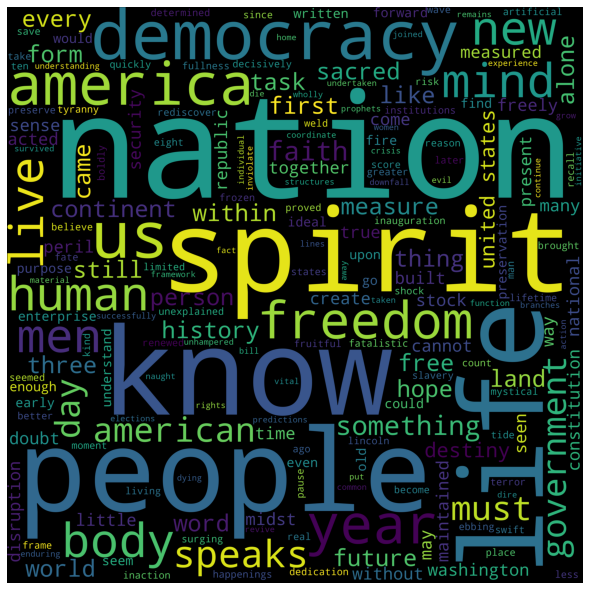

In [91]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100,stopwords=stopwords).generate(a.lower()) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1941-Roosevelt Speech (after cleaning)!!")
plt.show()

Word Cloud for 1961-Kennedy Speech (after cleaning)!!


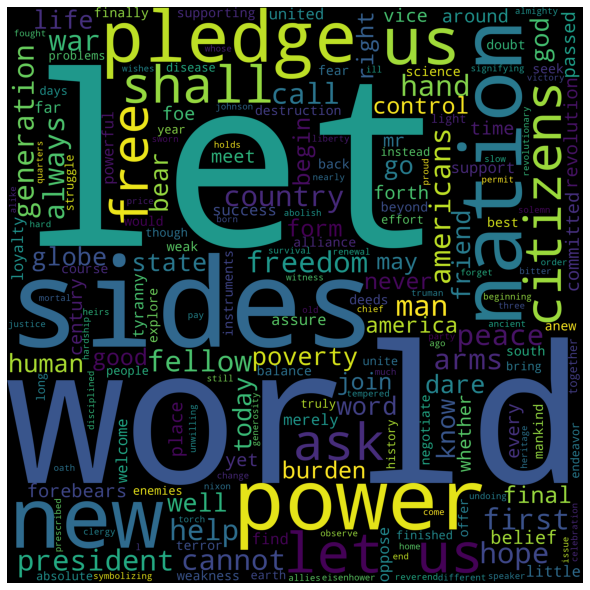

In [92]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100,stopwords=stopwords).generate(b.lower()) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1961-Kennedy Speech (after cleaning)!!")
plt.show()


Word Cloud for 1973-Nixon Speech (after cleaning)!!


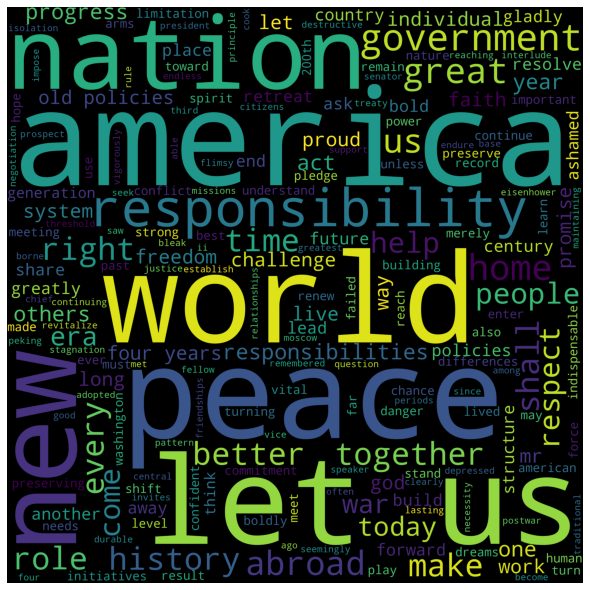

In [93]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100,stopwords=stopwords).generate(c.lower()) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1973-Nixon Speech (after cleaning)!!")
plt.show()